![picture](https://drive.google.com/uc?export=view&id=1lMwno8byG6VwCd4QQ5v0lek77BVz4-bD)




# Titanic Data Analysis - Who would have survived ?

#### In this notebook we'll explore the Titanic dataset and we'll try to predict who would have survived.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/content/titanic_train.csv')

In [50]:
print(data.shape)
data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
print("Number of passengers in dataset: " + str(len(data)))

Number of passengers in dataset: 891


## How many people survived ?

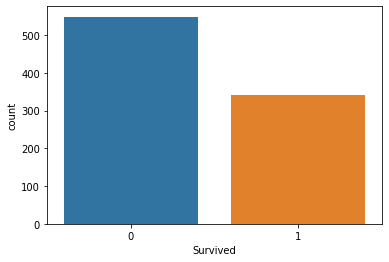

In [52]:
import seaborn as sns

sns.countplot(x="Survived", data=data)

## How many men and women survived ?

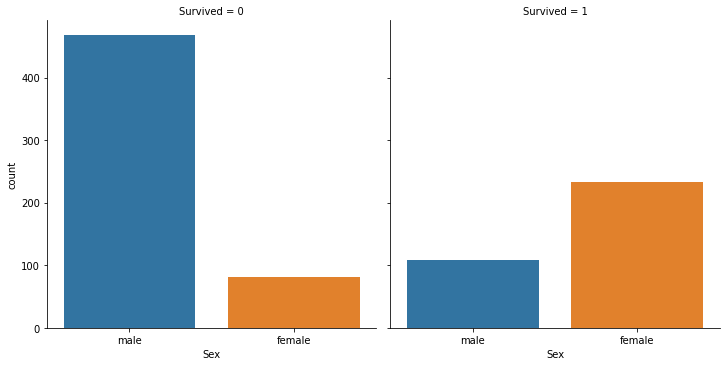

In [53]:
sns.catplot(x="Sex", col="Survived", kind="count", data=data)

## How many people in each class ?

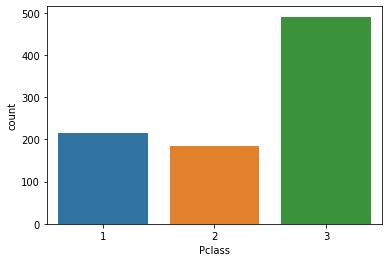

In [54]:
sns.countplot(x='Pclass', data=data)

## How many people survived for each class ?

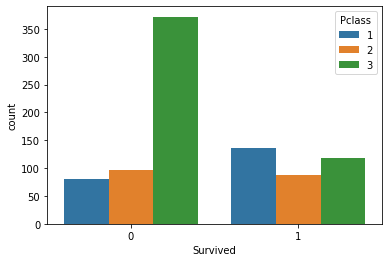

In [55]:
sns.countplot(x="Survived", hue="Pclass", data=data)

## How old were the people aboard ? Let's analyze the age distribution

#### A **kernel density estimate (KDE)** plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

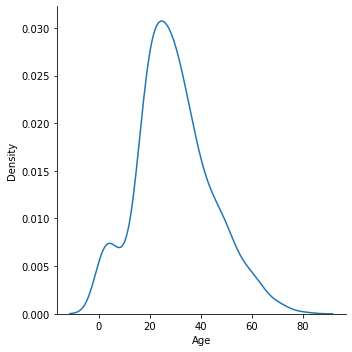

In [56]:
sns.displot(data, x="Age", kind="kde")

### Histogram visualization

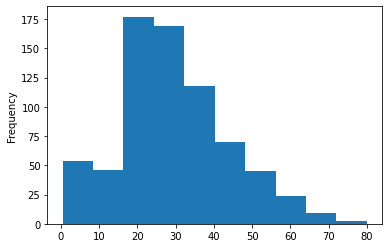

In [57]:
data["Age"].plot.hist()

### How much was the Passenger fare ?

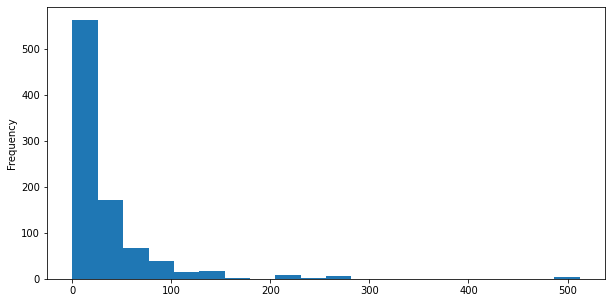

In [58]:
data["Fare"].plot.hist(bins=20, figsize=(10,5))

### How many siblings / spouses aboard ?

#### We can see that mostly neither a spouse or a children was aboard

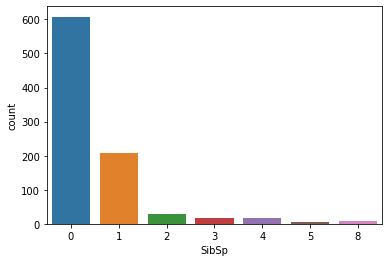

In [59]:
sns.countplot(x="SibSp", data=data)

# **Data wrangling or data cleaning**
### We'll remove all the useless columns as well as the NaN values in the dataset.

In [60]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

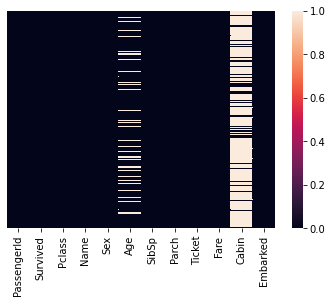

In [61]:
sns.heatmap(data.isnull(), yticklabels=False )

### The column "Cabin" has so many null values and it's an useless information: so we can drop it.

In [62]:
data = data.drop(columns=['Cabin'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### The column "Age" has some missing values: using the **Statistical Imputation** we can replace them with an average value.

#### Here we can see that older people were in the first class and younger people in second and third class.

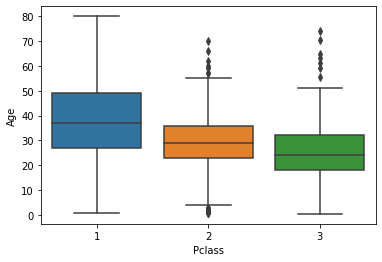

In [63]:
sns.boxplot(x="Pclass", y="Age", data=data)

### First we need to calculate the average Age for each class. 
### Then, we'll use it to replace the missing value.

In [64]:
Pclass1 = data.loc[data["Pclass"] == 1]
Pclass1_avg_age = int(Pclass1["Age"].mean())

Pclass2 = data.loc[data["Pclass"] == 2]
Pclass2_avg_age = int(Pclass2["Age"].mean())

Pclass3 = data.loc[data["Pclass"] == 3]
Pclass3_avg_age = int(Pclass3["Age"].mean())

print("Average age of Class 1 passengers: " + str(Pclass1_avg_age))
print("Average age of Class 2 passengers: " + str(Pclass2_avg_age))
print("Average age of Class 3 passengers: " + str(Pclass3_avg_age))


Average age of Class 1 passengers: 38
Average age of Class 2 passengers: 29
Average age of Class 3 passengers: 25


### Let's replace the average age of each class

In [65]:
def impute_average_age(col):
    age = col["Age"]
    pclass = col["Pclass"]
    if pd.isnull(age):
      if pclass == 1 :
        return Pclass1_avg_age
      elif pclass == 2:
        return Pclass2_avg_age
      else:
        return Pclass3_avg_age
    else:
      return age

In [66]:
data["Age"] = data[["Age","Pclass"]].apply(impute_average_age, axis=1)

In [67]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### Let's check if all null values have been removed

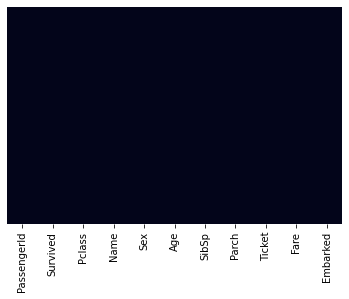

In [68]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False )

In [69]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

#### We can drop the only 2 rows with Embarked NaN values

In [70]:
data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# **Prediction with Logistic Regression**
#### Since our dataset is clean, we can predict the Survived value usign a ML technique.
#### But first we need to convert our String data into **categorical** data and remove all useless information

In [71]:
pd.get_dummies(data["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


#### We can use only the male (or female)  column and we can assign it to the Sex column into our dataset

In [72]:
sex = pd.get_dummies(data["Sex"],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


#### The Embarked column is also categorical (C, Q, S). We need only 2 columns: when both Q and S are zero, then C is 1

In [73]:
 embarked = pd.get_dummies(data["Embarked"], drop_first=True)
 embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [74]:
pclass = pd.get_dummies(data["Pclass"], drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


#### Now that all useful data are categorical, we can concatenate them into the initial dataframe. 
#### We can drop all other useless columns: PassengerId, Ticket, Name.

In [75]:
new_data = pd.concat([data, sex, embarked, pclass], axis=1)
new_data = new_data.drop(["Sex", "Embarked", "Pclass", "PassengerId", "Ticket", "Name"],axis=1)

In [76]:
new_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


#### We identify:

1.   the independent variable X (all column except Survived)
2.   the dependent variable y (only the column Survived which the ML algorithm should predict)



In [77]:
X = new_data.drop(["Survived"], axis=1)
y = new_data["Survived"]

#### Then we can split our dataset into training dataset and testing dataset, using the scikit-learn library

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Finally, let's train the **Logistic Regression** model

In [79]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Now we can verify how our model performs using the testing sets

In [80]:
predictions = model.predict(X_test)

### We have to compare the prediction values with the real values into the y_test. 
### There are different metrics like:


### 1. **Classification report**

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.81      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



## 2. **Confusion matrix**
#### matrix[0][0] = Predicted NO & Actual NO
#### matrix[0][1] = Predicted YES & Actual NO
#### matrix[1][0] = Predicted NO & Actual YES
#### matrix[1][1] = Predicted YES & Actual YES

In [82]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)

[[136  18]
 [ 38  76]]


### Let's calculate the accuracy from the confusion matrix

In [83]:
accuracy = (conf_matrix[0][0] + conf_matrix[1][1]) / conf_matrix.sum()
print(accuracy)

0.7910447761194029


### We can use the accuracy metric of sklearn library to calculate it. WE get the same values. See below

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7910447761194029